## Проект e-learning (вариант 2)    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Для начала подгрузим данные из четырёх имеющихся таблиц и посмотрим на то, как их интерпретировать:

- Файл **assessments.csv** - содержит в себе информацию об оценках. Каждый предмет в семестре включает ряд тестов с оценками, за которыми следует экзамен.

In [2]:
assesments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuksova/First_Project/assessments.csv')
assesments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


**code_module** — идентификационный код предмета. Предметы, которые есть в семестрах. Каждый оценивается определенным образом.

**code_presentation** — семестр, состоит из года и буквы(Идентификационный код). На этапе рассмотрения могу сделать предположение, что семестр состоит из нескольких предметов.

**id_assessment** — тест (Идентификационный номер).

**assessment_type** — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), 
компьютерная оценка (СМА), экзамен по курсу (Exam).

**date** — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

**weight** — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%. Сумма всех остальных оценок составляет 100%.

In [3]:
print(assesments.shape) # смотрим размерность датафрейма
print(assesments.dtypes) # знакомимся с типами данных
print(assesments.isna().value_counts()) # проверяем, где отсутствуют значения / колонка date - 11 отсутствующих значений

(206, 6)
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
code_module  code_presentation  id_assessment  assessment_type  date   weight
False        False              False          False            False  False     195
                                                                True   False      11
dtype: int64


_______________________________________________________________________________________________________________________________

- Файл **studentAssessment.csv** — содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

In [4]:
studAssesment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuksova/First_Project/studentAssessment.csv')
studAssesment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


**id_assessment** — тест (Идентификационный номер).

**id_student** — идентификационный номер студента.

**date_submitted** — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

**is_banked** — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам,
вернувшимся из академического отпуска).

**score** — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. 

**Оценка ниже 40 неуспешная сдача теста!**

In [5]:
print(studAssesment.shape) # смотрим размерность датафрейма
print(studAssesment.dtypes) # знакомимся с типами данных
print(studAssesment.isna().value_counts()) # проверяем, где отсутствуют значения / колонка score - 173 отсутствующих значений

(173912, 5)
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object
id_assessment  id_student  date_submitted  is_banked  score
False          False       False           False      False    173739
                                                      True        173
dtype: int64


_______________________________________________________________________________________________________________________________

- Файл **studentRegistration.csv** — содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

In [6]:
studReg = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuksova/First_Project/studentRegistration.csv')
studReg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код).

**id_student** — идентификационный номер студента.

**date_registration** — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

**date_unregistration** — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [7]:
print(studReg.shape) # смотрим размерность датафрейма
print(studReg.dtypes) # знакомимся с типами данных
print(studReg.isna().value_counts()) # проверяем, где отсутствуют значения date_registration / date_unregistration — у студентов, окончивших курс, это поле остается пустым.

(32593, 5)
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object
code_module  code_presentation  id_student  date_registration  date_unregistration
False        False              False       False              True                   22515
                                                               False                  10033
                                            True               False                     39
                                                               True                       6
dtype: int64


_______________________________________________________________________________________________________________________________

- Файл **courses.csv** — содержит список предметов по семестрам.

In [8]:
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuksova/First_Project/courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


**courses.csv** — файл содержит список предметов по семестрам.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код).

**module_presentation_length** — продолжительность семестра в днях.

In [9]:
print(courses.shape) # смотрим размерность датафрейма
print(courses.dtypes) # знакомимся с типами данных
print(courses.isna().value_counts()) # проверяем, где отсутствуют значения / таблица полная

(22, 3)
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object
code_module  code_presentation  module_presentation_length
False        False              False                         22
dtype: int64


_______________________________________________________________________________________________________________________________

### Обработка данных

По результатам рассмотрения данных можно заметить, что в каждой из таблиц находятся одинаковые колонки. Следовательно, таблицы можно попробовать объединить для дальнейшего удобства работы. Что я и сделаю :)

Буду использовать метод **merge** для табличного объединения, который соединяет строки в Dataframe на основе одного или нескольких ключей.

In [10]:
all_data = assesments.merge(courses, on=['code_module', 'code_presentation'])
all_data = all_data.merge(studReg, on=['code_module', 'code_presentation'])
all_data = all_data.merge(studAssesment, on=['id_assessment', 'id_student'])

In [11]:
all_data # получаем общую таблицу

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length,id_student,date_registration,date_unregistration,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,-159.0,NaN,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,268,28400,-53.0,NaN,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,268,31604,-52.0,NaN,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,268,32885,-176.0,NaN,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,268,38053,-110.0,NaN,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,269,2606765,-64.0,NaN,185,0,55.0
173908,GGG,2014J,37437,TMA,173.0,0.0,269,2620947,-23.0,NaN,179,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,269,2645731,-23.0,NaN,177,0,72.0
173910,GGG,2014J,37437,TMA,173.0,0.0,269,2648187,-129.0,NaN,172,0,70.0


Считаю, что данные подготовлены для дальнейшей работы.

_______________________________________________________________________________________________________________________________

### Задание 1. Сколько студентов успешно сдали только один курс? 

Для того, чтобы выполнить задание, необходимо понять, что в данном случае является курсом. 

В данных фигурирует формулировка, что **"Успешная сдача — это зачёт по курсу на экзамене"**. Следовательно, нам необходимо отфильтровать колонку **assessment_type** и выбрать экзамен.
А также необходимо учесть, что успешная сдача это **>= 40** набранных баллов.

Попробуем сгруппировать по предметам и семестрам выборку из студентов, которые набрали за экзамен >= 40 баллов.

In [12]:
success_exam = all_data.query('assessment_type == "Exam" & score >= 40') \
                        .groupby(['code_module', 'code_presentation'], as_index=False) \
                        .agg({'id_student':'count'}) \
                        .sort_values('code_presentation')
success_exam

,code_module,code_presentation,id_student
2,DDD,2013B,504
3,DDD,2013J,878
0,CCC,2014B,664
4,DDD,2014B,485
1,CCC,2014J,1019
5,DDD,2014J,842


Предположу, что одним курсом в данном случае является семестр (code_presentation). Тогда, получается, что у нас имеется **4** курса (2013B, 2013J, 2014B, 2014J).

Возможно, что для завершения курсов **2014B** и **2014J**, можно было сдать один экзамен по предмету из предложенных, либо **CCC**, либо **DDD**. В то время, как для завершения **2013B** и **2013J** достаточно было сдать предмет **DDD**. 

Но что, если оба предмета были необходимы для завершения курса?
Проверяем по времени длительности модуля.

In [13]:
success_exam_timing = all_data.query('assessment_type == "Exam" & score >= 40') \
                        .groupby(['code_module', 'code_presentation'], as_index=False) \
                        .agg({'module_presentation_length':'mean'}) \
                        .sort_values('code_presentation')
success_exam_timing

,code_module,code_presentation,module_presentation_length
2,DDD,2013B,240
3,DDD,2013J,261
0,CCC,2014B,241
4,DDD,2014B,241
1,CCC,2014J,269
5,DDD,2014J,262


Курсы 2014B и 2014J длятся в среднем 250+ дней, поэтому предположение о том, что оба предмета необходимы для сдачи - неверное. При совмещении и сдаче двух экзаменов получается практически год обучения, что не сходится с продолжительностью курсов 2013B и 2013J c одним экзаменом.


**Выбираю за основу то, что для завершения курсов 2014B и 2014J, можно было сдать один экзамен по предмету из предложенных.**

Теперь, для решения задания необходимо сгруппировать офильтрованные данные по студентам и посчитать, сколько из них успешно сдали один курс:

In [14]:
success_exam_1mod = all_data.query('assessment_type == "Exam" & score >= 40') \
                        .groupby('id_student', as_index=False) \
                        .agg({'code_module':'count'})
success_exam_1mod.query('code_module == 1').shape[0]

3802

**Ответ:** 3802 студента успешно сдали только один курс.

_______________________________________________________________________________________________________________________________

### Задание 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен


Для того, чтобы понять, насколько прост или сложен тот или иной экзамен в рамках определенного курса, мне необходимо посчитать, сколько людей сдало экзамен успешно и сколько всего было попыток сдать экзамен.

**Этап 1. Посчитаем, сколько студентов успешно сдали экзамены, добавим идентификационный номер теста, чтобы видеть, какой оказался сложнее.**

Фильтруем данные по успешным случаям сдачи, группируем по номеру теста, экзамену и курсу.

In [15]:
succ_exams = all_data.query('assessment_type == "Exam" & score >= 40') \
                     .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index=False) \
                     .agg({'id_student':'count'}).rename(columns={'id_student': 'successful'}) \
                     .sort_values('code_presentation')
succ_exams

,id_assessment,code_module,code_presentation,successful
2,25340,DDD,2013B,504
3,25354,DDD,2013J,878
0,24290,CCC,2014B,664
4,25361,DDD,2014B,485
1,24299,CCC,2014J,1019
5,25368,DDD,2014J,842


**Этап 2. Посчитаем, сколько студентов вообще сдавали экзамены, включая неудачные попытки.**

Фильтруем данные по всем экзаменационным сдачам, группируем по номеру теста, экзамену и курсу.

In [16]:
all_exams = all_data.query('assessment_type == "Exam"') \
                     .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index=False) \
                     .agg({'id_student':'count'}).rename(columns={'id_student': 'all_attempts'}) \
                     .sort_values('code_presentation')
all_exams

,id_assessment,code_module,code_presentation,all_attempts
2,25340,DDD,2013B,602
3,25354,DDD,2013J,968
0,24290,CCC,2014B,747
4,25361,DDD,2014B,524
1,24299,CCC,2014J,1168
5,25368,DDD,2014J,950


**Этап 3. Примёрджим таблицу с успешными сдачами к таблице со всеми сдачами по ключам с помощью merge.**

In [17]:
attempts = succ_exams.merge(all_exams, on=['id_assessment', 'code_module', 'code_presentation'])
attempts

,id_assessment,code_module,code_presentation,successful,all_attempts
0,25340,DDD,2013B,504,602
1,25354,DDD,2013J,878,968
2,24290,CCC,2014B,664,747
3,25361,DDD,2014B,485,524
4,24299,CCC,2014J,1019,1168
5,25368,DDD,2014J,842,950


**Этап 4. Мы помним, что завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен. Считаем!**

In [18]:
attempts['completeness'] = (attempts.successful / attempts.all_attempts).round(2) * 100
attempts.sort_values('completeness', ascending=False)

,id_assessment,code_module,code_presentation,successful,all_attempts,completeness
3,25361,DDD,2014B,485,524,93.0
1,25354,DDD,2013J,878,968,91.0
2,24290,CCC,2014B,664,747,89.0
5,25368,DDD,2014J,842,950,89.0
4,24299,CCC,2014J,1019,1168,87.0
0,25340,DDD,2013B,504,602,84.0


**Ответ:**

На выходе получаем колонку completeness с процентом завершаемости.
Из неё делаем вывод о том, что:

- самый сложный экзамен с **id = 25340 (DDD), курс 2013B** (завершаемость = 84 %)
- самый простой экзамен с **id = 25361 (DDD), курс 2014B** (завершаемость = 93 %)

_______________________________________________________________________________________________________________________________

### Задание 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Для выполнения задания необходимо обратить внимание на колонку **date_submitted** (дата сдачи теста студентом), которая измеряется как количество дней с начала семестра. Мы знаем, что семестр длится в среднем 250+ дней.

Здесь мне снова пригодится отфильтрованный по успешности сдачи экзамена датафрейм.
Посчитаем среднее количество дней для сдачи экзаменов с помощью **mean**.

In [19]:
mean_date_submitted = all_data.query('assessment_type == "Exam" & score >= 40') \
                        .groupby('code_module', as_index=False) \
                        .agg({'date_submitted':'mean'})

mean_date_submitted.round()

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


**Ответ:**
- средний срок сдачи экзамена по предмету **ССС** - **239 дней**.
- средний срок сдачи экзамена по предмету **DDD** - **238 дней**.

_______________________________________________________________________________________________________________________________

### Задание 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

Воспользуюсь тем же самым способом поэтапного распила и мёрджа как и во втором задании.
Не забуду учесть, что в колонке **date_registration** имеются отсутствующие значения. Точно так же не забуду учесть, что в колонке **date_unregistration** имеются пустые значения, которые сигнализируют о том, что студент окончил курс. Всё остальное будем считать за отток. 

Всё необходимое нам находится в оригинальном датафрейме **studReg**. Воспользуюсь им, так как при использовании **all_data** были расхождения в расчетах. 

(Количество регистраций в **studReg** отличается от **all_data** - их больше и выглядит так, будто в **all_data** я что-то потеряла при мёрдже).

В качестве "количества регистраций", будем считать уникальных студентов.

**Этап 1. Количество регистраций.**

Фильтруем данные и не берем в учет отсутствующие значения. Группируем по предмету и считаем уникальных студентов, которые зарегистрированы.

In [20]:
registration_count = studReg.query('date_registration != "NaN"') \
                            .groupby('code_module', as_index = False) \
                            .agg({'id_student':'nunique'}).rename(columns={'id_student':'registration'})
registration_count

,code_module,registration
0,AAA,712
1,BBB,7683
2,CCC,4244
3,DDD,5840
4,EEE,2858
5,FFF,7387
6,GGG,2525


**Этап 2. Подсчёт оттока.**

По аналогии с подсчетом количества регистраций.

In [21]:
unregistration_count = studReg.query('date_unregistration != "NaN"') \
                            .groupby('code_module', as_index = False) \
                            .agg({'id_student':'nunique'}).rename(columns={'id_student':'unregistration'})
unregistration_count

,code_module,unregistration
0,AAA,116
1,BBB,2314
2,CCC,1858
3,DDD,2065
4,EEE,693
5,FFF,2249
6,GGG,287


**Этап 3. Примёрджим таблицу с количеством регистраций к таблице с количеством оттока с помощью merge по ключу.**

In [22]:
reg_unreg = registration_count.merge(unregistration_count, on='code_module')
reg_unreg

,code_module,registration,unregistration
0,AAA,712,116
1,BBB,7683,2314
2,CCC,4244,1858
3,DDD,5840,2065
4,EEE,2858,693
5,FFF,7387,2249
6,GGG,2525,287


**Этап 4. Подсчитаем процент оттока: unregistration / registration.**

In [23]:
reg_unreg['outflow'] = (reg_unreg.unregistration / reg_unreg.registration).round(2) * 100
reg_unreg.sort_values('registration', ascending=False)

,code_module,registration,unregistration,outflow
1,BBB,7683,2314,30.0
5,FFF,7387,2249,30.0
3,DDD,5840,2065,35.0
2,CCC,4244,1858,44.0
4,EEE,2858,693,24.0
6,GGG,2525,287,11.0
0,AAA,712,116,16.0


**Ответ 1:**

Из данной таблицы делаем вывод по **ТОП-3** предметов по количеству регистраций: 

1) **BBB**

2) **FFF**

3) **DDD**

In [24]:
reg_unreg.sort_values('outflow', ascending=False)

,code_module,registration,unregistration,outflow
2,CCC,4244,1858,44.0
3,DDD,5840,2065,35.0
1,BBB,7683,2314,30.0
5,FFF,7387,2249,30.0
4,EEE,2858,693,24.0
0,AAA,712,116,16.0
6,GGG,2525,287,11.0


**Ответ 2:**

Из данной таблицы делаем вывод по **ТОП-3 (4 :D)** предметов по оттоку:

1) **CCC***, **DDD**

2) **BBB**

3) **FFF**

*Смущает CCC - не лидер по количеству оттока. Только по процентному соотношению!

_______________________________________________________________________________________________________________________________

### Задание 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 
* а разве можно было не pandas? :D

Самый простой вариант решения данного задания снова заключается в поэтапном распиле. Начнем с самых долгих средних сроков сдачи курсов.

**Этап 1. Выявление самого долгого среднего срока сдачи курса.**

In [25]:
long_time_mean = all_data.query('assessment_type == "Exam" & score >= 40') \
                         .groupby('code_presentation', as_index=False) \
                         .agg({'date_submitted':'mean'}) \
                         .sort_values('code_presentation', ascending=False)
long_time_mean

,code_presentation,date_submitted
3,2014J,243.680279
2,2014B,232.997389
1,2013J,239.509112
0,2013B,230.164683


**Делаем вывод из данной таблицы, что самый долгий семестр по среднему сроку сдачи курса - 2014J (244 дня)**

**Этап 2. Выявление семестра с самой низкой завершаемостью курсов.**

Похожее мы делали на этапе с заданием 2. Поэтому выведу датафрейм сразу с результатами.

In [26]:
# Успешные экзамены
succ_exams1 = all_data.query('assessment_type == "Exam" & score >= 40') \
                     .groupby(['code_module', 'code_presentation'], as_index=False) \
                     .agg({'id_student':'count'}).rename(columns={'id_student': 'successful'}) \
                     .sort_values('code_presentation')

# Все экзамены
all_exams1 = all_data.query('assessment_type == "Exam"') \
                     .groupby(['code_module', 'code_presentation'], as_index=False) \
                     .agg({'id_student':'count'}).rename(columns={'id_student': 'all_attempts'}) \
                     .sort_values('code_presentation')

# Объединение таблиц
attempts1 = succ_exams1.merge(all_exams1, on=['code_module', 'code_presentation'])
attempts1

# Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
attempts1['completeness'] = (attempts1.successful / attempts1.all_attempts).round(2) * 100
attempts1.sort_values('completeness', ascending=False)

,code_module,code_presentation,successful,all_attempts,completeness
3,DDD,2014B,485,524,93.0
1,DDD,2013J,878,968,91.0
2,CCC,2014B,664,747,89.0
5,DDD,2014J,842,950,89.0
4,CCC,2014J,1019,1168,87.0
0,DDD,2013B,504,602,84.0


**Делаем вывод из данной таблицы, что семестр с самой низкой завершаемостью курсов - 2013B (84 %)**

**Ответ:**
- семестр с самой низкой завершаемостью курсов - **2013B**.
- семестр с самыми долгими средними сроками сдачи курсов - **2014J**.

_______________________________________________________________________________________________________________________________

### Задание 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 

В адаптированной кластеризации можно выбрать следующие метрики: 

R - среднее время сдачи одного экзамена, 

F - завершаемость курсов, 

M - среднее количество баллов, получаемое за экзамен. 

Для анализа берем изначальную табличку **all_data**.

**Этап 1. Считаем R - среднее время сдачи одного экзамена для каждого студента**

In [27]:
R = all_data.query('assessment_type == "Exam" & score >= 40') \
                        .groupby('id_student', as_index=False) \
                        .agg({'date_submitted':'mean'}) \
                        .rename(columns={'date_submitted':'mean_date_submitted'})
R

,id_student,mean_date_submitted
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4092,2694886,236.0
4093,2694933,230.0
4094,2695608,237.0
4095,2697181,230.0


In [28]:
# Проверяем отсутствующие значения
R.mean_date_submitted.isna().value_counts()
# Отсутствуют

False    4097
Name: mean_date_submitted, dtype: int64

**Этап 2. Считаем F - считаем завершаемость курсов**

In [29]:
# Успешные экзамены каждого студента
f_exc = all_data.query('assessment_type == "Exam" & score >= 40') \
                     .groupby('id_student', as_index=False) \
                     .agg({'score':'count'}).rename(columns={'score':'succ_try'})

In [30]:
# Все экзамены
f_all = all_data.query('assessment_type == "Exam"') \
                     .groupby('id_student', as_index=False) \
                     .agg({'score':'count'}).rename(columns={'score':'all_try'})

In [31]:
# Объединение таблиц
F = f_all.merge(f_exc, how='left', on='id_student')

In [32]:
# Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
F['completeness'] = (F.succ_try / F.all_try) * 100
F

,id_student,all_try,succ_try,completeness
0,23698,1,1.0,100.0
1,24213,1,1.0,100.0
2,27116,1,1.0,100.0
3,28046,1,1.0,100.0
4,28787,1,1.0,100.0
...,...,...,...,...
4628,2694886,1,1.0,100.0
4629,2694933,1,1.0,100.0
4630,2695608,1,1.0,100.0
4631,2697181,1,1.0,100.0


In [33]:
# Проверяем на наличие NaN
F.completeness.isna().value_counts()

False    4097
True      536
Name: completeness, dtype: int64

In [34]:
# Терять данные значения было бы нехорошо, поэтому заполним отсутствующие значения 0. И отбрасываем ненужные колонки all_try, succ_try
F = F.fillna(0)
F = F.drop(['all_try', 'succ_try'], axis=1)

In [35]:
F

,id_student,completeness
0,23698,100.0
1,24213,100.0
2,27116,100.0
3,28046,100.0
4,28787,100.0
...,...,...
4628,2694886,100.0
4629,2694933,100.0
4630,2695608,100.0
4631,2697181,100.0


**Этап 3. Считаем M - считаем среднее количество баллов, получаемое за экзамен**

In [36]:
M = all_data.query('assessment_type == "Exam"') \
                     .groupby('id_student', as_index=False) \
                     .agg({'score':'mean'}).rename(columns={'score':'mean_score'})
M

,id_student,mean_score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4628,2694886,69.0
4629,2694933,73.0
4630,2695608,73.0
4631,2697181,80.0


In [37]:
M.mean_score.isna().value_counts()
# Пропущенные значения отсутствуют

False    4633
Name: mean_score, dtype: int64

**Этап 4. Создаем категории для R, F и М**

По изученным урокам понимаю, что в разделении на категории нам поможет функция **pd.cut()**

In [38]:
# для определения промежутков R для наших значений будем использовать квантили, их можно посмотреть с помощью ф-ции describe
R.mean_date_submitted.describe()

count    4097.000000
mean      238.466317
std         5.632457
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: mean_date_submitted, dtype: float64

In [39]:
# для определения промежутков F для наших значений будем использовать промежутки завершаемости.
F.completeness.unique()

array([100.,   0.,  50.])

In [40]:
# для определения промежутков M для наших значений будем использовать квантили, их можно посмотреть с помощью ф-ции describe
M.mean_score.describe()

count    4633.000000
mean       65.117958
std        20.470561
min         0.000000
25%        50.000000
50%        66.000000
75%        82.000000
max       100.000000
Name: mean_score, dtype: float64

**Перед тем, как продолжить, объединим имеющиеся R, F, M**

In [41]:
RFM = M.merge(F, how='left', on='id_student').merge(R, how='left', on='id_student')
RFM

,id_student,mean_score,completeness,mean_date_submitted
0,23698,80.0,100.0,243.0
1,24213,58.0,100.0,236.0
2,27116,96.0,100.0,243.0
3,28046,40.0,100.0,237.0
4,28787,44.0,100.0,243.0
...,...,...,...,...
4628,2694886,69.0,100.0,236.0
4629,2694933,73.0,100.0,230.0
4630,2695608,73.0,100.0,237.0
4631,2697181,80.0,100.0,230.0


**Этап 5. Разделяем на категории и присваиваем лейблы.**

In [42]:
RFM['R'] = pd.cut(RFM.mean_date_submitted,[0, 229.000000, 234.000000, 241.000000, 243.000000], labels=[1, 2, 3, 4])
RFM['F'] = pd.cut(RFM.completeness,[0, 50.0, 100.0], labels=[1, 2])
RFM['M'] = pd.cut(RFM.mean_score,[0, 50.000000, 66.000000, 82.000000, 100.000000], labels=[1, 2, 3, 4])

In [43]:
RFM = RFM[['id_student', 'R', 'F', 'M']]
RFM

,id_student,R,F,M
0,23698,4,2,3
1,24213,3,2,2
2,27116,4,2,4
3,28046,3,2,1
4,28787,4,2,1
...,...,...,...,...
4628,2694886,3,2,3
4629,2694933,2,2,3
4630,2695608,3,2,3
4631,2697181,2,2,3


In [44]:
# Наблюдаем отсутствующие значения, заполняем нулями.
RFM.isna().value_counts()

id_student  R      F      M    
False       False  False  False    3275
            True   False  False     822
                   True   False     533
                          True        3
dtype: int64

In [45]:
# Заполнить сразу не можем, потому что нам необходимо поменять тип данных.
RFM.dtypes

id_student       int64
R             category
F             category
M             category
dtype: object

In [55]:
# Сложно, но нашелся вот такой чит! Думаю, что использование pd.cut() было не самым удобным решением. Решение в статье показалось тяжелее
# Оцениваю решение как "из под палки"
RFM[['R', 'F', 'M']] = RFM[['R', 'F', 'M']].astype('float').astype('Int8').fillna(0)
RFM[['R', 'F', 'M']] = RFM[['R', 'F', 'M']].astype('int64')
pd.options.mode.chained_assignment = None

In [47]:
RFM.dtypes

id_student    int64
R             int64
F             int64
M             int64
dtype: object

**Этап 6. Собираем колонку RFM для оценки кластеров**

In [48]:
RFM['RFM'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,id_student,R,F,M,RFM
0,23698,4,2,3,423
1,24213,3,2,2,322
2,27116,4,2,4,424
3,28046,3,2,1,321
4,28787,4,2,1,421
...,...,...,...,...,...
4628,2694886,3,2,3,323
4629,2694933,2,2,3,223
4630,2695608,3,2,3,323
4631,2697181,2,2,3,223


Проработав в школе достаточно большое количество времени, могу сказать, что для подбора кластеров стоит разделять студентов на более подробные категории:

- Отличник
- Кандидат в отличники
- Хорошист
- Не хватает мотивации
- Троечник
- Двоечник
- Отчислен / Иная причина

Между каждой основной категорией присутствует уточнение, которое поможет лучше понять обучающихся.

Для распределения кластеров необходимо посмотреть, какое количество студентов в каком промежутке от максимального до минимального находится в уникальном RFM.

In [49]:
RFM_count = RFM.groupby('RFM', as_index = False) \
                .agg({'id_student':'count'}) \
                .sort_values('RFM', ascending = False)
RFM_count

,RFM,id_student
29,424,244
28,423,357
27,422,350
26,421,163
25,412,1
24,411,2
23,324,178
22,323,305
21,322,247
20,321,109


**Этап 7. Списки для кластеров**

**Распределяем каждый кластер по полученным значениям:**

In [50]:
mark5 = ['424', '024', '324', '224', '124'] # отличник
almost_mark_5 = ['323', '423', '123'] # кандидат в отличники
mark4 = ['223', '422', '023','222', '322'] # хорошист
motivation = ['122', '412', '212', '312', '022'] # не хватает мотивации
mark3 = ['321', '421', '112', '411'] # троечник
control = ['111', '211', '121', '221', '311'] # требуется постоянный контроль
mark2 = ['000', '001', '021'] # отчисление / иные причины

**Создаем колонку Groups, куда будем записывать кластер, к которому принадлежит ученик, проверяем значения RFM:**

In [51]:
RFM['Groups'] = RFM['RFM'].apply(lambda x: 'отличник' if x in mark5\
                                         else 'кандидат в отличники' if x in almost_mark_5\
                                         else 'хорошист' if x in mark4\
                                         else 'не хватает мотивации' if x in motivation\
                                         else 'троечник' if x in mark3\
                                         else 'требуется постоянный контроль' if x in control\
                                         else 'отчисление / иные причины')


**Получаем итоговый датасет с разбитием студентов по кластерам:**

In [52]:
RFM

,id_student,R,F,M,RFM,Groups
0,23698,4,2,3,423,кандидат в отличники
1,24213,3,2,2,322,хорошист
2,27116,4,2,4,424,отличник
3,28046,3,2,1,321,троечник
4,28787,4,2,1,421,троечник
...,...,...,...,...,...,...
4628,2694886,3,2,3,323,кандидат в отличники
4629,2694933,2,2,3,223,хорошист
4630,2695608,3,2,3,323,кандидат в отличники
4631,2697181,2,2,3,223,хорошист


**Этап 8. Построим визуализацию для наглядного распределения студентов по группам**

In [53]:
RFM_1 = RFM.groupby('Groups', as_index=False)\
            .agg({'id_student':'count'})\
            .sort_values('id_student', ascending=False)
RFM_1

,Groups,id_student
6,хорошист,1449
2,отличник,1040
0,кандидат в отличники,698
3,отчисление / иные причины,658
5,троечник,275
1,не хватает мотивации,265
4,требуется постоянный контроль,248


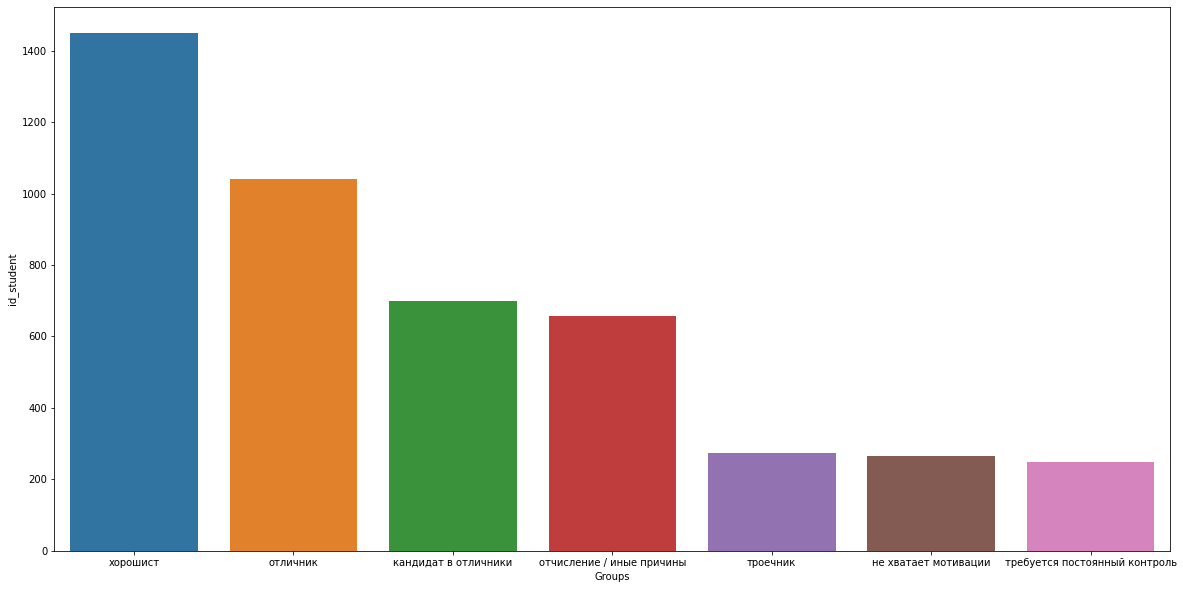

In [54]:
plt.figure(figsize=(20, 10))
b_plot_rfm = sns.barplot(x=RFM_1.Groups, y=RFM_1.id_student)

### Вывод

По итогам выполненного задания, можно увидеть, что учащиеся осваивают образовательную програму успешно. Наличие неуспевающих групп говорит о том, что необходимо постоянно контролировать студентов в их учебной деятельности, что поможет поднять общую успеваемость.